In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Conv2D ,Dropout ,Flatten ,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train ,y_train) ,(x_test ,y_test) = mnist.load_data();
input_shape =(28,28,1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train =x_train.reshape(x_train.shape[0] ,28,28,1)
x_test =x_test.reshape(x_test.shape[0] ,28,28,1)

In [4]:
x_train =x_train.astype("float32")
x_test =x_test.astype("float32")

In [5]:
x_train =x_train /255
x_test =x_test /255
print("shape of Training :",x_train.shape)
print("shape of Testing :",x_test.shape)

shape of Training : (60000, 28, 28, 1)
shape of Testing : (10000, 28, 28, 1)


In [6]:
model = Sequential()
model.add(Conv2D(28 ,kernel_size=(3,3) ,input_shape =input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(10 ,activation ="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         473,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,590 (1.81 MB)

 Trainable params: 474,590 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer ='SGD' ,loss ='sparse_categorical_crossentropy' ,
              metrics =['accuracy'])
model.fit(x_train ,y_train ,epochs =2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7163 - loss: 0.9623
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9184 - loss: 0.2742


In [9]:
test_loss ,test_acc =model.evaluate(x_test ,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9439 - loss: 0.1921
loss=0.165
Accuracy=0.952


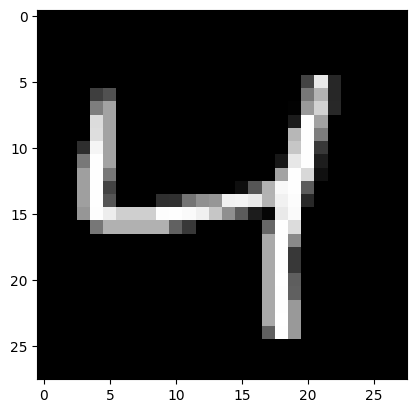

In [13]:
image =x_train[2]
plt.imshow(np.squeeze(image) ,cmap ='grey')
plt.show()

In [14]:
image =image.reshape(1,image.shape[0] ,image.shape[1] ,image.shape[2])
predict_model =model.predict([image])
print("predicted class:{} " .format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted class:4 
